In [1]:
import numpy as np
import pandas as pd
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import bartlett

# Visualization

In [4]:
df = pd.read_csv('data/data_preprocessed.csv')

In [2]:
df_2016 = pd.read_csv('data/df_2016.csv')

In [3]:
tmp1 = df_2016[df_2016['Q1D3']=='있다'].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp2 = df_2016[df_2016['Q1E3']=='있다'].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp3 = df_2016[df_2016['Q1F3']=='있다'].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp4 = df_2016[df_2016['Q1G3']=='있다'].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp5 = df_2016[df_2016['Q1H3']=='있다'].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp6 = (tmp1+tmp2+tmp3+tmp4+tmp5)/5

Text(0.5, 0, '')

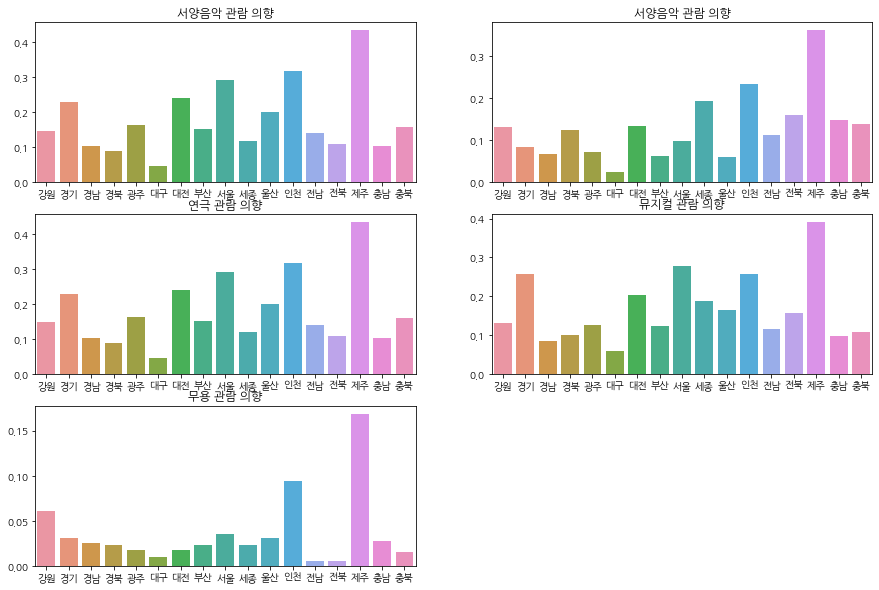

In [79]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.barplot(tmp3.index, tmp3.values)
plt.title('서양음악 관람 의향')
plt.xlabel('')

plt.subplot(3,2,2)
sns.barplot(tmp2.index, tmp2.values)
plt.title('서양음악 관람 의향')
plt.xlabel('')

plt.subplot(3,2,3)
sns.barplot(tmp3.index, tmp3.values)
plt.title('연극 관람 의향')
plt.xlabel('')

plt.subplot(3,2,4)
sns.barplot(tmp4.index, tmp4.values)
plt.title('뮤지컬 관람 의향')
plt.xlabel('')

plt.subplot(3,2,5)
sns.barplot(tmp5.index, tmp5.values)
plt.title('무용 관람 의향')
plt.xlabel('')

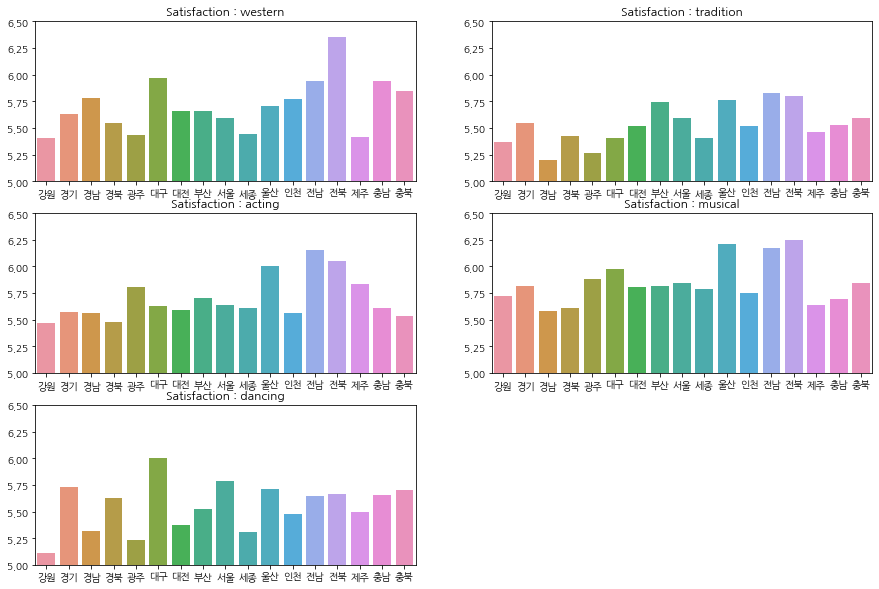

In [23]:
plt.figure(figsize=(15,10))

for i, genre in enumerate(genres):
    plt.subplot(3, 2, i+1)
    temp = df.groupby('location')['satisfy_'+genre].mean()

    plt.title('Satisfaction : ' + genre)
    plt.ylim(5, 6.5)
    sns.barplot(temp.index, temp.values)
    plt.xlabel('')

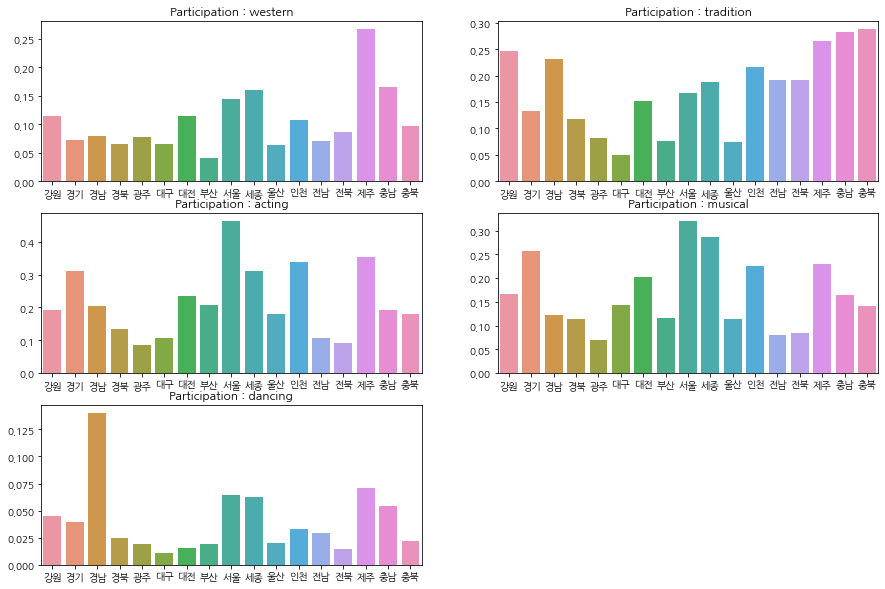

In [24]:
plt.figure(figsize=(15,10))

for i, genre in enumerate(genres):
    plt.subplot(3, 2, i+1)
    temp = df.groupby('location')['count_'+genre].mean()

    plt.title('Participation : ' + genre)
    sns.barplot(temp.index, temp.values)
    plt.xlabel('')

# Hypothesis test
- ### Intention to see performance varies by number of programs (of each region)

In [ ]:
# preprocess intention of 2019
df_2019.loc[:, 'q1_3_m2':'q1_3_m10'] =  df_2019.loc[:, 'q1_3_m2':'q1_3_m10'].fillna('없음')
df_2019['q1d3'] = 0

In [11]:
dic = [('q1d3','서양음악'), ('q1e3','전통예술'), ('q1f3','연극'), ('q1g3','뮤지컬'), ('q1h3','무용')]

for col, word in dic:
    df_2019[col] = 0
    for i in range(len(df_2019)):
        if word in df_2019['q1_3'][i]: 
            df_2019[col][i] = 1
        for j in range(2, 11):
            if word in df_2019['q1_3_m'+str(j)]:
                df_2019[col][i] = 1
            

In [12]:
df_show_plan = pd.read_csv('data/기획공연실적.csv', encoding='cp949')
df_show_plan = df_show_plan.iloc[2:, 1:]
df_show_plan.columns = ['지역', '2018', '2017', '2016', '2015']
df_show_plan = df_show_plan.sort_values('지역').reset_index(drop=True)
df_show_plan.iloc[:, 1:] = df_show_plan.iloc[:, 1:].applymap(lambda x: int(x))

df_show_rent = pd.read_csv('data/대관공연실적.csv', encoding='cp949')
df_show_rent = df_show_rent.iloc[2:, 1:].reset_index(drop=True)
df_show_rent.columns = ['지역', '2018', '2017', '2016', '2015']
df_show_rent = df_show_rent.sort_values('지역').reset_index(drop=True)
df_show_rent.iloc[:, 1:] = df_show_rent.iloc[:, 1:].applymap(lambda x: int(x))

df_show_total = df_show_plan.copy()
df_show_total['2015'] += df_show_rent['2015']
df_show_total['2016'] += df_show_rent['2016']
df_show_total['2017'] += df_show_rent['2017']
df_show_total['2018'] += df_show_rent['2018']

In [13]:
intent_western = {2016:'Q1D3', 2018:'Q1C3', 2019:'q1d3'}
intent_tradition = {2016:'Q1E3', 2018:'Q1D3', 2019:'q1e3'}
intent_acting = {2016:'Q1F3', 2018:'Q1E3', 2019:'q1f3'}
intent_muscial = {2016:'Q1G3', 2018:'Q1F3', 2019:'q1g3'}
intent_dancing = {2016:'Q1H3', 2018:'Q1G3', 2019:'q1h3'}

In [38]:
tmp1 = df_2016[(df_2016['Q1D3']=='있다') |
               (df_2016['Q1E3']=='있다') |
               (df_2016['Q1F3']=='있다') |
               (df_2016['Q1G3']=='있다') |
               (df_2016['Q1H3']=='있다')].groupby('SQ1')['ID'].count() / df_2016.groupby('SQ1')['ID'].count()
tmp1 = tmp1.values
tmp1 = pd.Series(tmp1)
tmp2 = df_show_total['2016']

,Source,ddof1,ddof2,F,p-unc,np2
0,location,16,460.456685,3.978999,4.269289e-07,0.036385


In [29]:
df_utility = pd.read_csv('data/공연프로그램가동률.csv', encoding='cp949')
df_utility = df_utility.iloc[1:, 1:]
df_utility.columns = ['지역', '2016', '2017', '2018']
df_utility = df_utility.sort_values('지역').reset_index(drop=True)

In [39]:
X = pd.concat([tmp1, tmp2], axis=1)
X.columns = ['intent', 'diversity']
X['diversity'] = X['diversity'].astype(int)

In [40]:
y = X.intent
x = X.diversity.astype(int)

In [79]:
# Normality assumption test: Shapiro-Wilk test
normal1 = shapiro(x)
normal2 = shapiro(y)
print(normal1)
print(normal2)

ShapiroResult(statistic=0.5779769420623779, pvalue=6.420776571758324e-06)
ShapiroResult(statistic=0.9393036961555481, pvalue=0.31002166867256165)


#### p-value > 0.05 -> Do not satisfy assumption of normality
#### commit Non-paramatic test

In [77]:
# Non-paramatic test: Kruskal-Wallis test
kruskal(x, y)

KruskalResult(statistic=24.771428571428572, pvalue=6.454718995113277e-07)

#### p-value > 0.05 -> reject the null hypothesis

- ### Intention to see performance varies by number of programs (of each year)

In [111]:
df_2014 = pd.read_excel('data/문화향수실태조사_2014.xlsx')
df_2014.drop(index=0, inplace=True)

In [142]:
var0 = df_2014[(df_2014['Q1_1_3']!=99) |
               (df_2014['Q1_1_4']!=99) |
               (df_2014['Q1_1_5']!=99) |
               (df_2014['Q1_1_6']!=99) |
               (df_2014['Q1_1_7']!=99)]['ID'].count() / len(df_2014)
var1 = df_2016[(df_2016['Q1D3']=='있다') |
               (df_2016['Q1E3']=='있다') |
               (df_2016['Q1F3']=='있다') |
               (df_2016['Q1G3']=='있다') |
               (df_2016['Q1H3']=='있다')]['ID'].count() / len(df_2016)
var2 = df_2018[(df_2018['Q1C3']=='의향 있다') |
               (df_2018['Q1D3']=='의향 있다') |
               (df_2018['Q1E3']=='의향 있다') |
               (df_2018['Q1F3']=='의향 있다') |
               (df_2018['Q1G3']=='의향 있다')]['ID'].count() / len(df_2018)
tmp1 = [var0, var1, var2]
tmp2 = [46346, df_show_total['2016'].sum(), df_show_total['2018'].sum()]


In [143]:
# Normality assumption test: Shapiro-Wilk test
y = pd.Series(tmp1)
X = pd.Series(tmp2)
normal1 = shapiro(X)
normal2 = shapiro(y)
print(normal1)
print(normal2)

ShapiroResult(statistic=0.7722233533859253, pvalue=0.0497802309691906)
ShapiroResult(statistic=0.8564425706863403, pvalue=0.2578345835208893)


#### Do not satisfy assumption of normality -> Non-paramatic test

In [144]:
# Non-paramatic test: Kruskal-Wallis test
kruskal(x, y)

KruskalResult(statistic=7.285714285714278, pvalue=0.006950508943083776)

#### p-value > 0.05 -> reject the null hypothesis

- ### Satisfaction to performance varies by region

In [ ]:
df = pd.read_csv('data/data_regression.csv')

In [118]:
lst = []
for i in df['location'].unique():
    print(shapiro(df[df['location']==i]['satisfaction'].dropna()))
    lst.append(df[df['location']==i]['satisfaction'].dropna())

ShapiroResult(statistic=0.876480221748352, pvalue=1.5684329792910109e-18)
ShapiroResult(statistic=0.885016918182373, pvalue=1.5781177698366263e-32)
ShapiroResult(statistic=0.8891726732254028, pvalue=5.622676607195027e-21)
ShapiroResult(statistic=0.8821089267730713, pvalue=4.140602825072979e-15)
ShapiroResult(statistic=0.8523436784744263, pvalue=1.3491069155921465e-13)
ShapiroResult(statistic=0.8520336747169495, pvalue=3.2448570758878103e-18)
ShapiroResult(statistic=0.8685113787651062, pvalue=2.712692613075625e-20)
ShapiroResult(statistic=0.8477697968482971, pvalue=4.838613995761676e-21)
ShapiroResult(statistic=0.8676857352256775, pvalue=2.3940049771752782e-37)
ShapiroResult(statistic=0.8497705459594727, pvalue=1.1726075305860278e-15)
ShapiroResult(statistic=0.8439996242523193, pvalue=3.4732390125793533e-16)
ShapiroResult(statistic=0.8550016283988953, pvalue=3.1636861195635385e-28)
ShapiroResult(statistic=0.8340228796005249, pvalue=5.866535369606707e-15)
ShapiroResult(statistic=0.763975

#### Do not satisfy assumption of normality -> Non-paramatic test

(array([  2.,  18., 153.,   0., 444., 619., 324.]),
 array([2.        , 2.71428571, 3.42857143, 4.14285714, 4.85714286,
        5.57142857, 6.28571429, 7.        ]),
 <BarContainer object of 7 artists>)

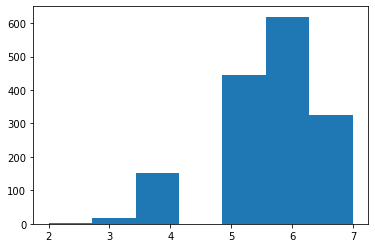

In [94]:
plt.hist(df[df['location']=='경기']['satisfaction'].dropna(), bins=7)

In [121]:
kruskal(lst[0], lst[1], lst[2], lst[3], lst[4], lst[5], lst[6], lst[7], lst[8], lst[9], lst[10],
        lst[11], lst[12], lst[13], lst[14], lst[15], lst[16])

KruskalResult(statistic=169.67490678416974, pvalue=9.775881652660842e-28)

#### p-value > 0.05 -> reject the null hypothesis